### Sentiment Analysis - NLP
Perform sentiment/emotional analysis using IBM Natural Language Understanding API on Office experience responses

In [1]:
import pandas as pd
import datetime as dt
import time
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EmotionOptions, KeywordsOptions, SentimentOptions
import urllib3

#Provide API key
api_key = IAMAuthenticator('')
nlu = NaturalLanguageUnderstandingV1(version='2019-07-12', authenticator=api_key)

#Provide API URL
nlu.set_service_url('https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/a4809297-78ef-4b53-ad74-1aee1056963f')

#Disable SSL verification
nlu.set_disable_ssl_verification(True)
urllib3.disable_warnings()

#Read response CSVs
q1_data = pd.read_csv('')
q2_data = pd.read_csv('')

#Clean Brandwatch columns
q1_text = q1_data['text'].copy()
q2_text = q2_data['text'].copy()


In [60]:
#Create scores dataframe
scores = pd.DataFrame(columns = ['Text', 'Sentiment Score', 'Sentiment Label', 
                                  'Sad', 'Joy', 'Fear', 'Disgust', 'Anger'])

#Loop through tweets and score emotion/sentiment for each, then append to scores dataframe
x = 0

for line in q2_text:
    
    x+=1
    if x % 100 == 0: print(x)
    
    response = nlu.analyze(text = line,features = Features(emotion=EmotionOptions(document=True),sentiment=SentimentOptions(document=True)),language='en',verify=False).get_result()
    
    s_score = response['sentiment']['document']['score']
    s_label = response['sentiment']['document']['label']
    e_sad = response['emotion']['document']['emotion']['sadness']
    e_joy = response['emotion']['document']['emotion']['joy']
    e_fear = response['emotion']['document']['emotion']['fear']
    e_disgust = response['emotion']['document']['emotion']['disgust']
    e_anger = response['emotion']['document']['emotion']['anger']

    new_score = pd.DataFrame(data = [[line, s_score, s_label, e_sad, e_joy, e_fear, e_disgust, e_anger]],
                       columns = ['Text', 'Sentiment Score', 'Sentiment Label', 'Sad', 'Joy', 'Fear', 'Disgust', 'Anger'])
    scores = scores.append(new_score)
    
scores = scores.reset_index(drop=True)
scores

100
200
300
400
500
600


,Text,Sentiment Score,Sentiment Label,Sad,Joy,Fear,Disgust,Anger
0,"Boston office culture: Loved it. Structure, ar...",0.791624,positive,0.008937,0.761455,0.012725,0.012673,0.011360
1,Is trying to get involved with the security gr...,0.253910,positive,0.488648,0.612568,0.118836,0.110067,0.110688
2,"Talked about changing projects, how to navigat...",0.894168,positive,0.106721,0.377277,0.106729,0.057682,0.075621
3,Would be cool to have informal virtual lunches...,0.707767,positive,0.052216,0.676993,0.044904,0.055485,0.049827
4,Identifies himself as a community builder with...,0.842499,positive,0.125457,0.586926,0.054606,0.047707,0.071209
...,...,...,...,...,...,...,...,...
644,"ERG groups, good involvemnet today from analys...",0.745162,positive,0.183991,0.530139,0.036743,0.009458,0.231004
645,I havent found things I can contribute to. My ...,0.602657,positive,0.021180,0.363650,0.061394,0.018923,0.065893
646,would like to see more CDP used to actual even...,-0.446227,negative,0.306282,0.113780,0.145004,0.103367,0.108527
647,just getting back to the office would be aweso...,0.835529,positive,0.013981,0.872791,0.055596,0.015319,0.016635


In [61]:
#Append the newly created columns from scores dataframe to Brandwatch metadata
scored_data = q2_data.copy()
scored_data['Sentiment Score'] = scores['Sentiment Score']
scored_data['Sentiment Label'] = scores['Sentiment Label']
scored_data['Sad'] = scores['Sad']
scored_data['Joy'] = scores['Joy']
scored_data['Fear'] = scores['Fear']
scored_data['Disgust'] = scores['Disgust']
scored_data['Anger'] = scores['Anger']
scored_data

,docnum,Topic1,Topic2,Topic3,Question,text,Topic_Assgn,Sentiment Score,Sentiment Label,Sad,Joy,Fear,Disgust,Anger
0,1,0.162471,0.405054,0.432475,"Boston office culture: Loved it. Structure, ar...","Boston office culture: Loved it. Structure, ar...",3,0.791624,positive,0.008937,0.761455,0.012725,0.012673,0.011360
1,2,0.382984,0.170815,0.446201,Is trying to get involved with the security gr...,Is trying to get involved with the security gr...,3,0.253910,positive,0.488648,0.612568,0.118836,0.110067,0.110688
2,3,0.190014,0.475866,0.334121,"Talked about changing projects, how to navigat...","Talked about changing projects, how to navigat...",2,0.894168,positive,0.106721,0.377277,0.106729,0.057682,0.075621
3,4,0.441038,0.329087,0.229874,Would be cool to have informal virtual lunches...,Would be cool to have informal virtual lunches...,1,0.707767,positive,0.052216,0.676993,0.044904,0.055485,0.049827
4,5,0.384907,0.454438,0.160655,Identifies himself as a community builder with...,Identifies himself as a community builder with...,2,0.842499,positive,0.125457,0.586926,0.054606,0.047707,0.071209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,645,0.696624,0.165603,0.137773,"ERG groups, good involvemnet today from analys...","ERG groups, good involvemnet today from analys...",1,0.745162,positive,0.183991,0.530139,0.036743,0.009458,0.231004
645,646,0.272376,0.361404,0.366220,I havent found things I can contribute to. My ...,I havent found things I can contribute to. My ...,3,0.602657,positive,0.021180,0.363650,0.061394,0.018923,0.065893
646,647,0.472026,0.168160,0.359814,would like to see more… CDP used to actual eve...,would like to see more CDP used to actual even...,1,-0.446227,negative,0.306282,0.113780,0.145004,0.103367,0.108527
647,648,0.524390,0.295930,0.179679,just getting back to the office would be aweso...,just getting back to the office would be aweso...,1,0.835529,positive,0.013981,0.872791,0.055596,0.015319,0.016635


In [62]:
#Group data topic
group_data = scored_data.groupby(['Topic_Assgn']).agg({
    'text':'count', 'Sentiment Score':'mean', 'Sad':'mean', 'Joy':'mean', 'Fear':'mean', 'Disgust':'mean',
'Anger':'mean'}).rename(columns={'text':'Response Count'}).reset_index()

group_data

,Topic_Assgn,Response Count,Sentiment Score,Sad,Joy,Fear,Disgust,Anger
0,1,335,0.365543,0.186151,0.497769,0.067571,0.049348,0.070436
1,2,219,0.356616,0.180936,0.450029,0.067669,0.048812,0.067715
2,3,95,0.288099,0.185547,0.510227,0.067580,0.047900,0.069548


In [63]:
#Group data sentiemtn
group_data = scored_data.groupby(['Sentiment Label']).agg({
    'text':'count', 'Sentiment Score':'mean', 'Sad':'mean', 'Joy':'mean', 'Fear':'mean', 'Disgust':'mean',
'Anger':'mean'}).rename(columns={'text':'Response Count'}).reset_index()

group_data

,Sentiment Label,Response Count,Sentiment Score,Sad,Joy,Fear,Disgust,Anger
0,negative,110,-0.613776,0.322658,0.340476,0.105273,0.061460,0.094387
1,neutral,136,0.000000,0.176335,0.315209,0.079636,0.064401,0.079039
2,positive,403,0.733103,0.149227,0.579304,0.053264,0.040330,0.059307


In [64]:
#Group data topic and sentiment
group_data = scored_data.groupby(['Topic_Assgn','Sentiment Label']).agg({
    'text':'count', 'Sentiment Score':'mean', 'Sad':'mean', 'Joy':'mean', 'Fear':'mean', 'Disgust':'mean',
'Anger':'mean'}).rename(columns={'text':'Response Count'}).reset_index()

group_data

,Topic_Assgn,Sentiment Label,Response Count,Sentiment Score,Sad,Joy,Fear,Disgust,Anger
0,1,negative,50,-0.624149,0.318297,0.361317,0.096743,0.064679,0.103762
1,1,neutral,76,0.000000,0.195505,0.327027,0.085573,0.071646,0.079726
2,1,positive,209,0.735236,0.151135,0.592501,0.054046,0.037572,0.059085
3,2,negative,33,-0.604917,0.344688,0.311146,0.125125,0.059332,0.077557
4,2,neutral,51,0.000000,0.148286,0.290701,0.070552,0.055545,0.077169
5,2,positive,135,0.726378,0.153243,0.544168,0.052535,0.043697,0.061738
6,3,negative,27,-0.605393,0.303810,0.337732,0.096805,0.058099,0.097597
7,3,neutral,9,0.000000,0.173393,0.354303,0.080986,0.053399,0.083838
8,3,positive,59,0.740933,0.133281,0.612951,0.052162,0.042394,0.054532


In [65]:
neg_responses = scored_data[['Sentiment Label','text']]
neg_responses = neg_responses[neg_responses['Sentiment Label'] == 'negative']
neg_responses.columns = ['Sentiment', 'Response']
neg_responses

,Sentiment,Response
5,negative,Would be nicer when we had new joiners - to kn...
7,negative,This is now going to be the way of life with r...
10,negative,Have more connections more often - even if jus...
15,negative,"Hardly any time to check Accenture email, not ..."
27,negative,Only been here 2.5 months.\r\n \r\nNot really ...
...,...,...
615,negative,not welcoming. A lot of people left
626,negative,Has no real vision for the Boston office cultu...
634,negative,Always on client job sites so no real experience
638,negative,if there is a way to share events that are hap...


In [66]:
neg_responses.to_csv('q2_negative_input.csv',index=False)

## Wordcloud Generator

In [33]:
import pprint
import pandas as pd
import datetime

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

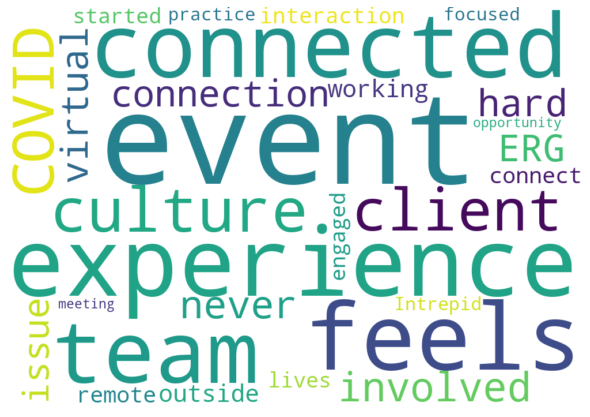

In [54]:
text = " ".join(neg_responses['text'])

stopwords = set(STOPWORDS)
stopwords.update(['Boston','office','work','people','time','really','bos','feel','much','accenture','community',
                  'know','part','live','good','project','lot','now','thing','go','day','new','dont','person','things',
                  'going','based','see','year','projects','able','need','years','group'
                 ])

wordcloud = WordCloud(width = 1000, height = 700,
                      stopwords=stopwords,
                      max_words=28,
                      background_color='white',
                      min_font_size = 10,
                      max_font_size = 220,
                      collocations=True).generate(text)

plt.figure(figsize = (8, 10), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()